In [2]:
import matplotlib.pyplot as plot 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
#Loading the Variable from Preproccessing.ipynb
import pickle
with open('session_state.pkl', 'rb') as file:
   Dataset_ds = pickle.load(file)
# 142095 Entries ;35 Columns ; Index = formated.time

* Distribution Plot

In [4]:
list = Dataset_ds.columns
listb = list[0:7]

In [5]:
Dataset_ds.value_counts().max()

1856

In [6]:
Dist_info = {'Max':Dataset_ds[list].describe().max(), 'Min': Dataset_ds[list].describe().min(),
             'Mean':Dataset_ds[list].describe().mean(), 'Std':np.std(Dataset_ds[list])}
pd.DataFrame(Dist_info)

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Max,Min,Mean,Std
arp.opcode,1.420950e+05,0.0,1.776215e+04,1.577644e-01
arp.hw.size,1.420950e+05,0.0,1.776271e+04,6.279795e-01
icmp.checksum,1.420950e+05,0.0,2.783832e+04,1.169539e+04
icmp.seq_le,1.420950e+05,0.0,2.779412e+04,1.146563e+04
icmp.transmit_timestamp,7.728902e+07,0.0,9.916877e+06,1.858947e+06
http.content_length,1.420950e+05,0.0,2.825104e+04,2.419630e+02
http.response,1.420950e+05,0.0,1.776203e+04,2.195973e-01
tcp.ack,2.147333e+09,0.0,3.191048e+08,3.258470e+08
tcp.ack_raw,4.294947e+09,0.0,1.385296e+09,1.279610e+09
tcp.checksum,1.420950e+05,0.0,4.264827e+04,2.079134e+04


In [7]:
Dist_info['Std'].nlargest(10)

tcp.ack_raw                1.279610e+09
tcp.ack                    3.258470e+08
tcp.seq                    1.663416e+07
icmp.transmit_timestamp    1.858947e+06
tcp.dstport                2.466361e+04
tcp.checksum               2.079134e+04
icmp.checksum              1.169539e+04
icmp.seq_le                1.146563e+04
udp.stream                 1.020659e+04
udp.port                   6.464491e+02
dtype: float64

In [8]:
std_large_list = ['tcp.ack_raw', 'tcp.ack', 'tcp.seq']  
#fig , axs = plot.subplots(ncols=3, nrows=1, figsize=(50,30))
sns.histplot(data= Dataset_ds, x= std_large_list[2], stat= 'count', bins= 'auto', kde=True)

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

<Figure size 6000x9000 with 0 Axes>

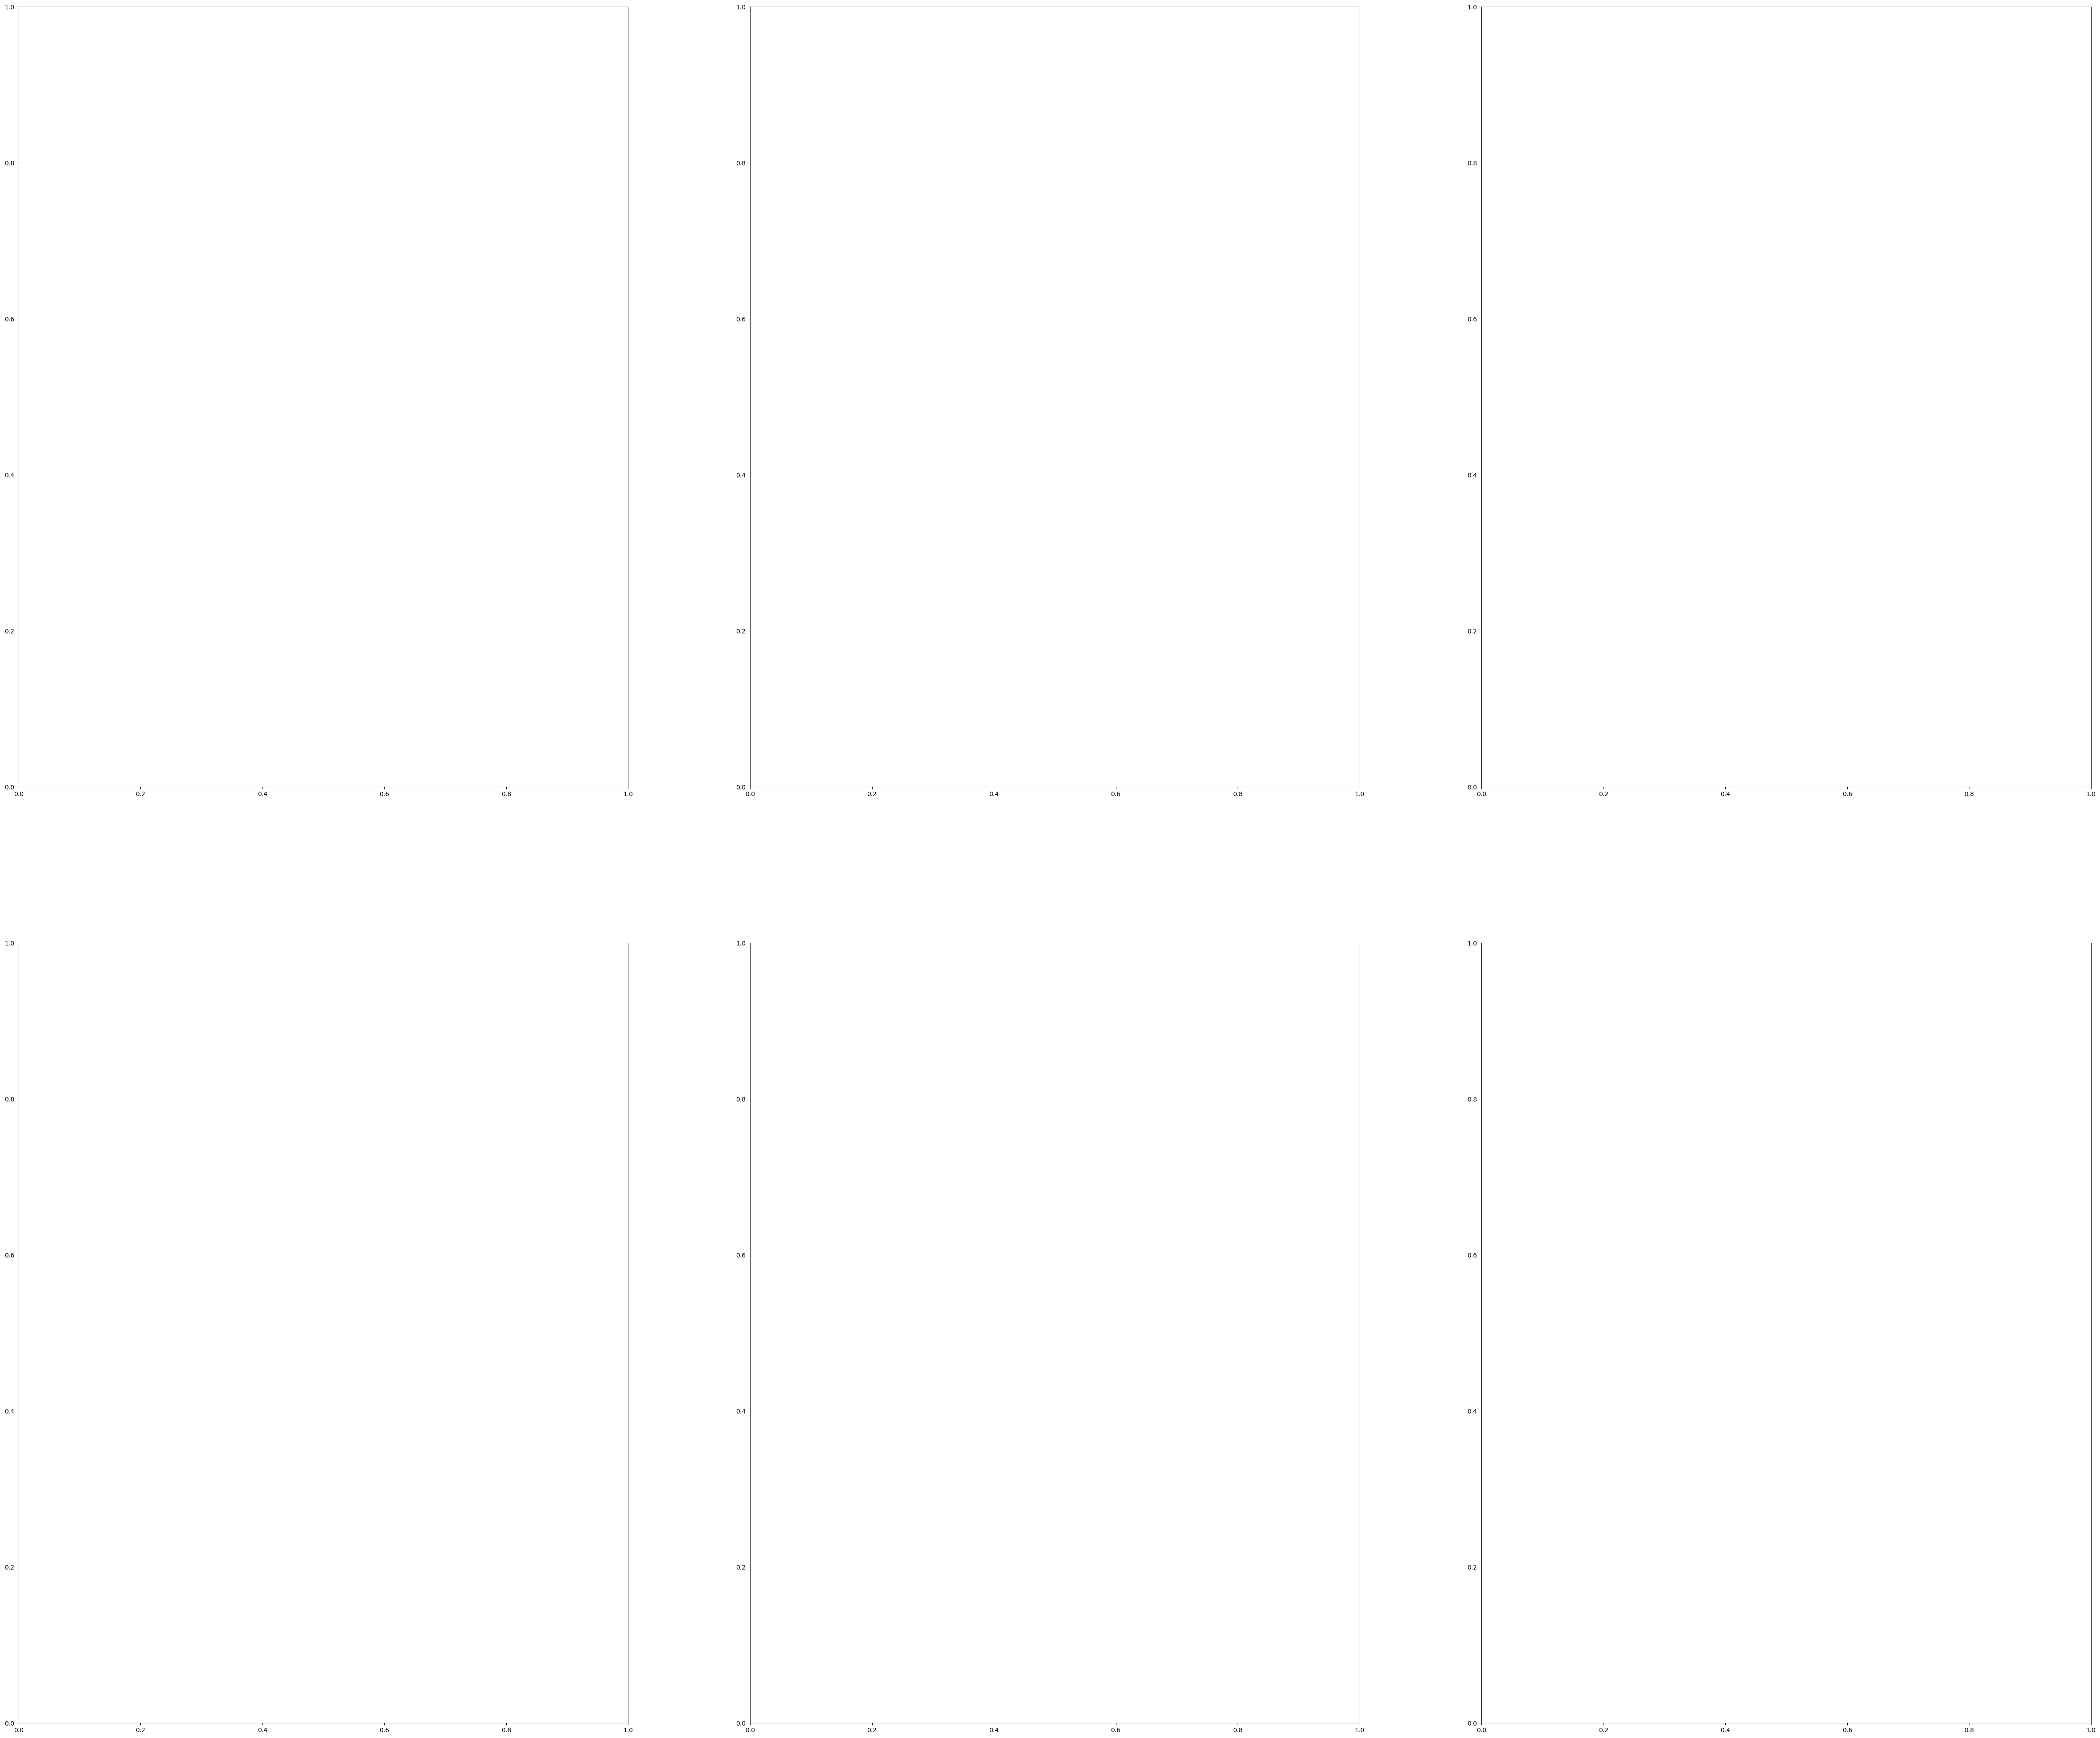

In [81]:
plot.clf()
fig , axs = plot.subplots(ncols=3, nrows=2, figsize=(60,50))
axs = axs.flatten()

In [82]:
for i in range(6):
    sns.histplot(data= Dataset_ds, x= listb[i], stat= 'count', bins= 'auto', kde=True, ax=axs[i])

c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\haris\anaconda3\envs\Bachelorarbeit\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

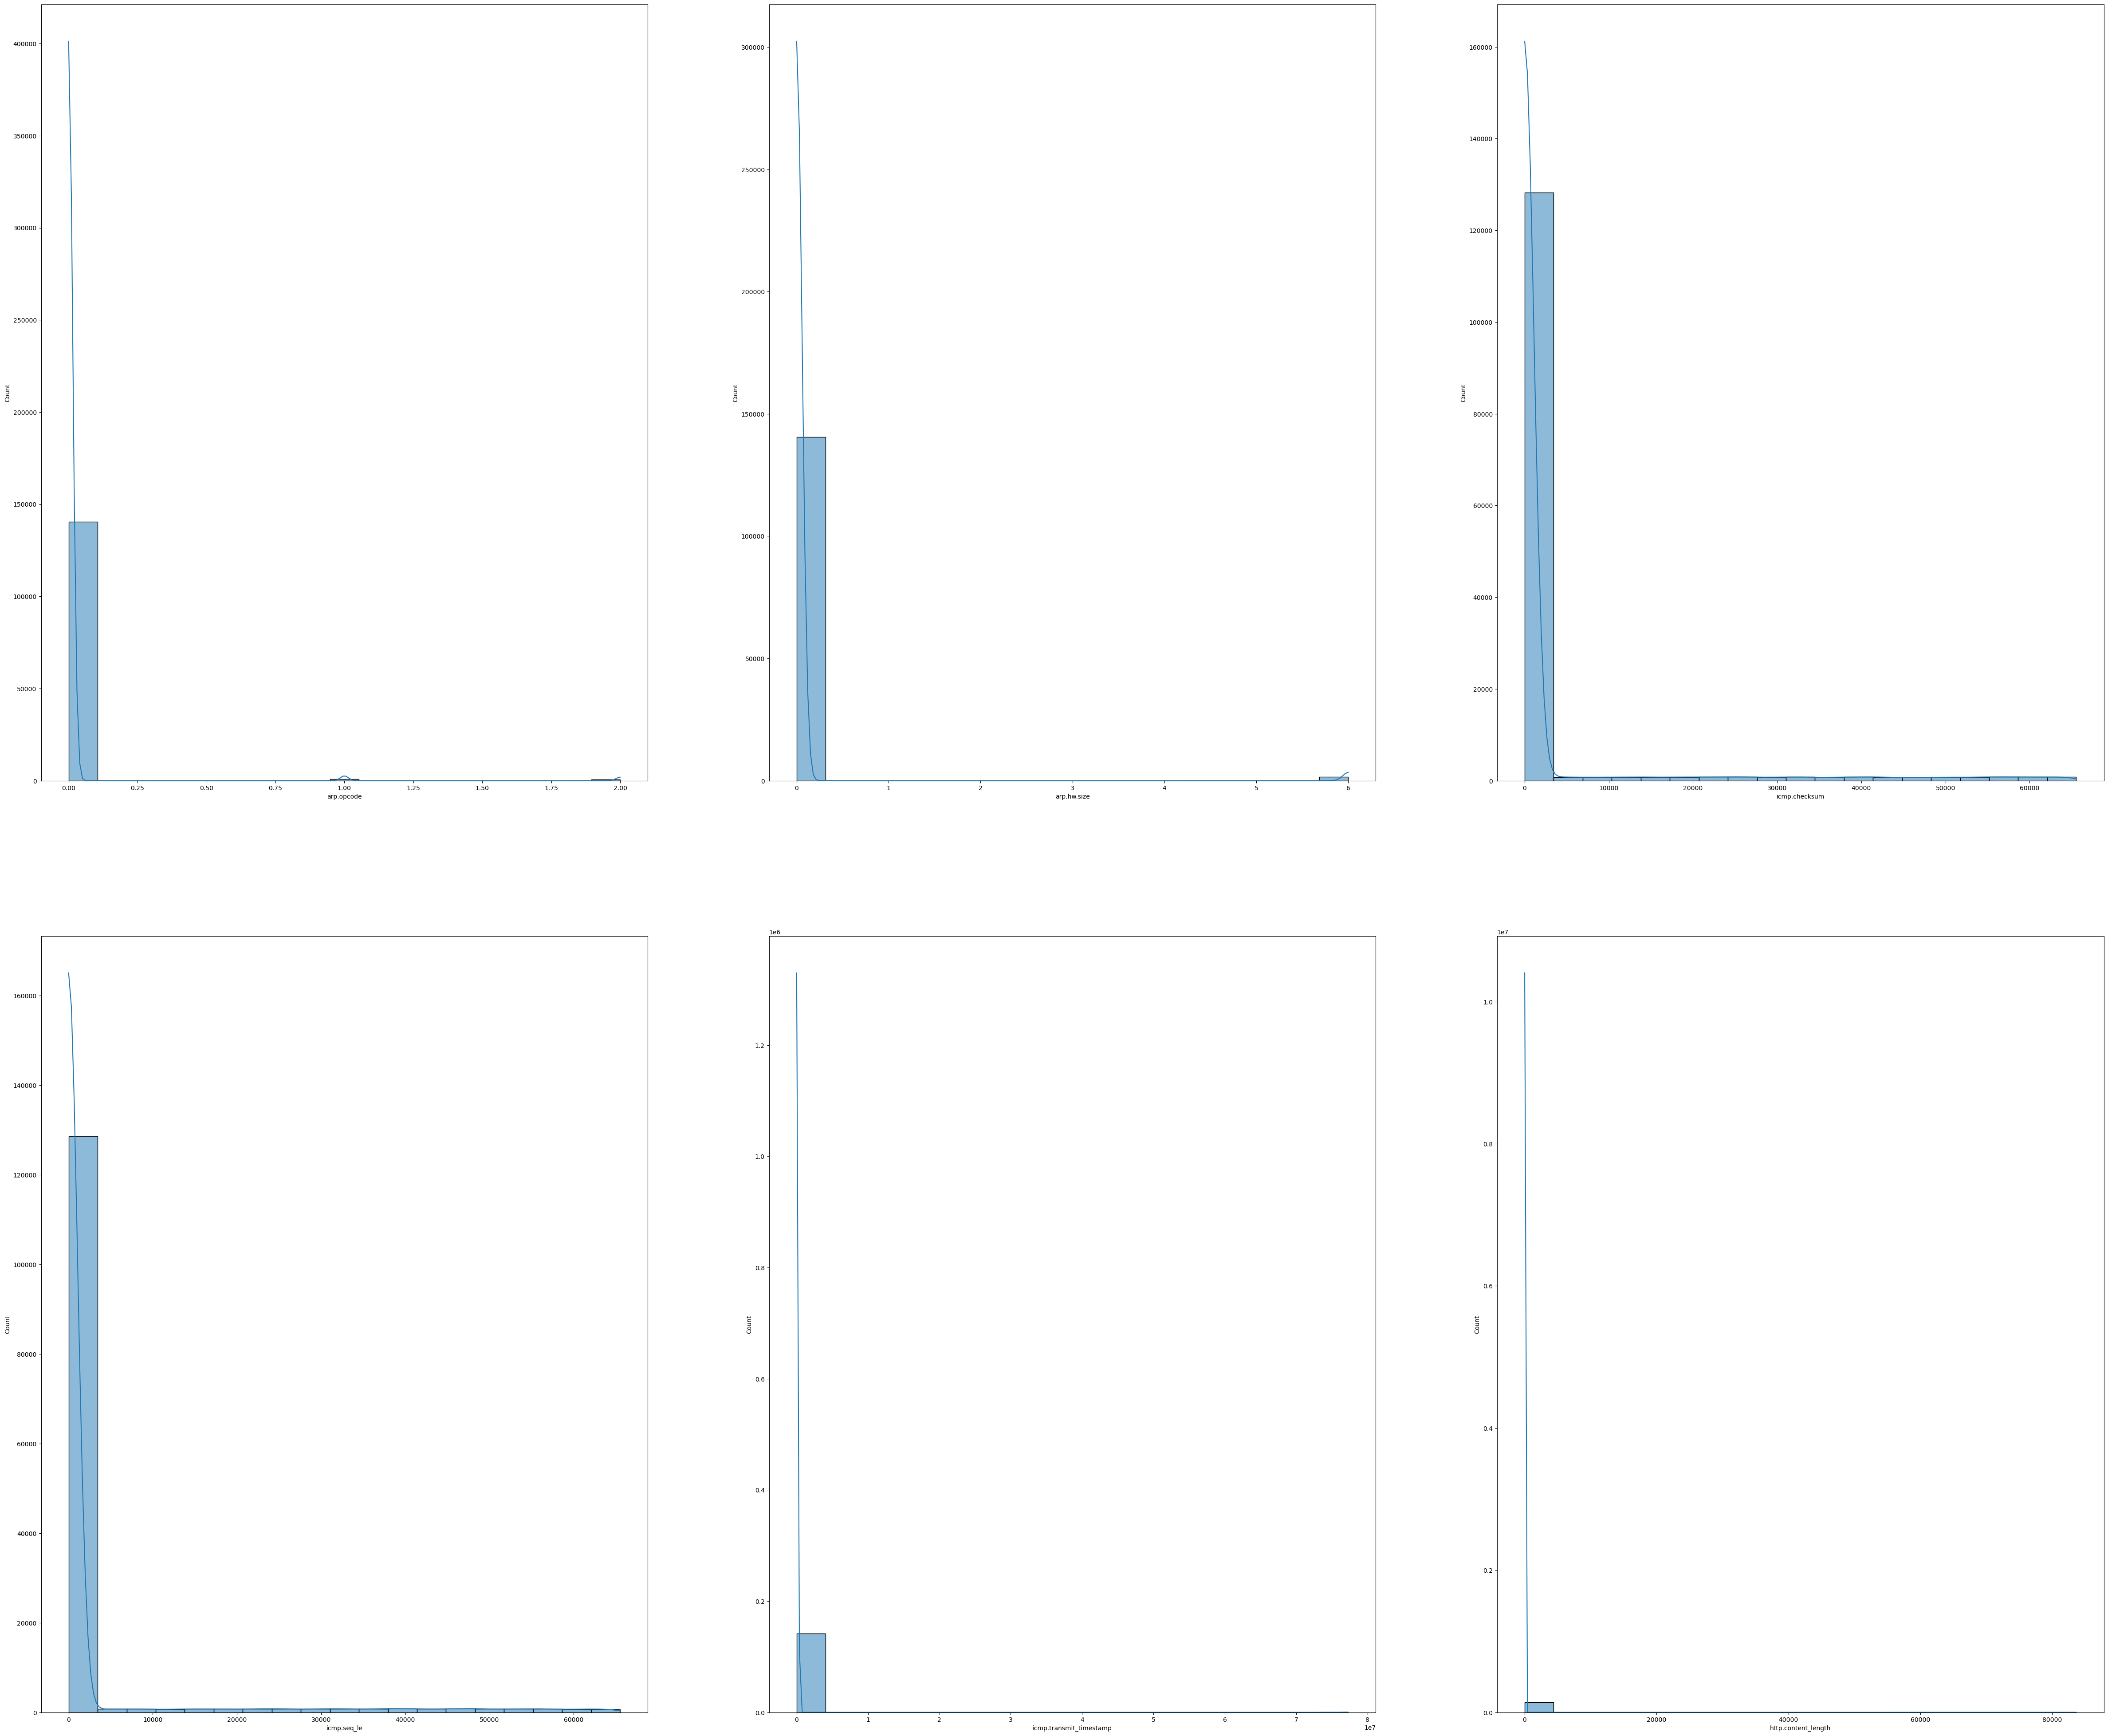

In [83]:
plot.figure(num=fig)

In [18]:
Column_list = [i for i in range(10)]
Dataset_ds.iloc[:,Column_list].describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum
count,142095.000000,142095.000000,142095.000000,142095.000000,1.420950e+05,142095.000000,142095.000000,1.420950e+05,1.420950e+05,142095.000000
mean,0.015764,0.066463,3384.092699,3275.321194,4.494089e+04,16.341947,0.050804,7.951399e+07,1.508478e+09,28647.759232
std,0.157765,0.627982,11695.430702,11465.669030,1.858954e+06,241.963820,0.219598,3.258481e+08,1.279614e+09,20791.414373
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,1.672418e+08,9227.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00,1.432766e+09,28104.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,7.030000e+02,2.399180e+09,46786.000000
max,2.000000,6.000000,65532.000000,65517.000000,7.728902e+07,83655.000000,1.000000,2.147333e+09,4.294947e+09,65535.000000


* Heatmap <br>
To represent Correlation between Features

In [65]:
corr_Data = Dataset_ds.corr(method="pearson") # the corr methods are ‘pearson’, ‘kendall’, ‘spearman’
corr_Data

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,...,dns.retransmit_request,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,Attack_label
arp.opcode,1.000000,0.944123,-0.028913,-0.028544,-0.002416,-0.006749,-0.023117,-0.024383,-0.117794,-0.137679,...,-0.000265,-0.009413,-0.009413,-0.013145,-0.012252,-0.013145,-0.009413,-0.009398,-0.009413,0.039935
arp.hw.size,0.944123,1.000000,-0.030624,-0.030233,-0.002559,-0.007148,-0.024485,-0.025826,-0.124765,-0.145828,...,-0.000281,-0.009970,-0.009970,-0.013923,-0.012978,-0.013923,-0.009970,-0.009954,-0.009970,0.040571
icmp.checksum,-0.028913,-0.030624,1.000000,0.716962,0.055884,-0.019543,-0.066942,-0.070609,-0.341106,-0.398690,...,-0.000768,-0.027259,-0.027259,-0.038066,-0.035480,-0.038066,-0.027259,-0.027215,-0.027259,0.131425
icmp.seq_le,-0.028544,-0.030233,0.716962,1.000000,-0.006906,-0.019293,-0.066089,-0.069709,-0.336758,-0.393608,...,-0.000758,-0.026912,-0.026912,-0.037580,-0.035028,-0.037580,-0.026912,-0.026868,-0.026912,0.129750
icmp.transmit_timestamp,-0.002416,-0.002559,0.055884,-0.006906,1.000000,-0.001633,-0.005593,-0.005899,-0.028499,-0.033311,...,-0.000064,-0.002278,-0.002278,-0.003180,-0.002964,-0.003180,-0.002278,-0.002274,-0.002278,0.010981
http.content_length,-0.006749,-0.007148,-0.019543,-0.019293,-0.001633,1.000000,0.266713,-0.016479,0.034912,0.013759,...,-0.000179,-0.006363,-0.006363,-0.008885,-0.008282,-0.008885,-0.006363,-0.006352,-0.006363,0.030676
http.response,-0.023117,-0.024485,-0.066942,-0.066089,-0.005593,0.266713,1.000000,-0.056449,0.125243,0.049046,...,-0.000614,-0.021795,-0.021795,-0.030435,-0.028368,-0.030435,-0.021795,-0.021760,-0.021795,0.105080
tcp.ack,-0.024383,-0.025826,-0.070609,-0.069709,-0.005899,-0.016479,-0.056449,1.000000,-0.015022,0.051906,...,-0.000647,-0.022989,-0.022989,-0.032102,-0.029922,-0.032102,-0.022989,-0.022952,-0.022989,0.103394
tcp.ack_raw,-0.117794,-0.124765,-0.341106,-0.336758,-0.028499,0.034912,0.125243,-0.015022,1.000000,0.238131,...,-0.003127,0.050724,0.050724,0.063142,0.057275,0.063142,0.050724,0.041823,0.050724,-0.101385
tcp.checksum,-0.137679,-0.145828,-0.398690,-0.393608,-0.033311,0.013759,0.049046,0.051906,0.238131,1.000000,...,-0.003655,0.020167,0.020167,0.025664,0.024145,0.025664,0.020167,0.018059,0.020167,-0.084197


In [75]:
# Heatmap
sns.heatmap(corr_Data, annot=False)

<Axes: >